In [9]:
import pandas as pd

In [10]:
df = pd.read_csv('EGDAR.csv')

In [11]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

In [12]:
df

,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash flow fron Operations,Revenue Growth (%),Net Income Growth (%)
0,Microsoft,2023,211915,72361,411976,205753,87582,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,89035,-6.438902,0.520999
2,Microsoft,2021,168088,61271,333779,191791,76740,-15.222676,-15.764800
3,Tesla,2023,69773,14974,106618,43009,13256,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,14724,16.752899,-15.940964
5,Tesla,2021,53823,5644,62131,30548,11497,-33.928703,-55.160086
6,Apple,2023,383285,96995,352583,290437,110543,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,122151,2.881146,2.894995
8,Apple,2021,365817,94680,351002,287912,104038,-7.230275,-5.133112


In [13]:
import pandas as pd

# Sample data (replace this with your actual data)
data = {
    "Company": ["Microsoft", "Microsoft", "Microsoft", "Tesla", "Tesla", "Tesla", "Apple", "Apple", "Apple"],
    "Year": [2023, 2022, 2021, 2023, 2022, 2021, 2023, 2022, 2021],
    "Total Revenue": [211915, 198270, 168088, 69773, 81462, 53823, 383285, 394328, 365817],
    "Net Income": [72361, 72738, 61271, 14974, 12587, 5644, 96995, 94680, 94680],
    "Total Assets": [411976, 364840, 333779, 106618, 82338, 62131, 352583, 352755, 351002],
    "Total Liabilities": [205753, 198298, 191791, 43009, 36440, 30548, 290437, 302083, 287912],
    "Cash flow from Operations": [87582, 89035, 76740, 13256, 14724, 11497, 110543, 122151, 104038],
    "Revenue Growth (%)": [None, -6.44, -15.22, None, 16.75, -33.92, None, 2.88, -7.23],
    "Net Income Growth (%)": [None, 0.52, -15.76, None, -15.94, -55.16, None, 2.89, -5.13],
}

df = pd.DataFrame(data)

# 1. Grouping by Company: Aggregate metrics
company_group = df.groupby("Company").agg(
    {
        "Total Revenue": "sum",
        "Net Income": "sum",
        "Cash flow from Operations": "sum",
        "Revenue Growth (%)": "mean",
        "Net Income Growth (%)": "mean",
    }
).reset_index()

# 2. Grouping by Year: Aggregate metrics
year_group = df.groupby("Year").agg(
    {
        "Total Revenue": "sum",
        "Net Income": "sum",
        "Cash flow from Operations": "sum",
        "Revenue Growth (%)": "mean",
        "Net Income Growth (%)": "mean",
    }
).reset_index()

# 3. Financial Ratios: Debt-to-Assets and Net Income Margin
df["Debt-to-Assets Ratio"] = df["Total Liabilities"] / df["Total Assets"]
df["Net Income Margin"] = df["Net Income"] / df["Total Revenue"]

# Display results
print("Aggregated by Company:")
print(company_group)

print("\nAggregated by Year:")
print(year_group)

print("\nDataset with Financial Ratios:")
print(df)


Aggregated by Company:
     Company  Total Revenue  Net Income  Cash flow from Operations  \
0      Apple        1143430      286355                     336732   
1  Microsoft         578273      206370                     253357   
2      Tesla         205058       33205                      39477   

   Revenue Growth (%)  Net Income Growth (%)  
0              -2.175                  -1.12  
1             -10.830                  -7.62  
2              -8.585                 -35.55  

Aggregated by Year:
   Year  Total Revenue  Net Income  Cash flow from Operations  \
0  2021         587728      161595                     192275   
1  2022         674060      180005                     225910   
2  2023         664973      184330                     211381   

   Revenue Growth (%)  Net Income Growth (%)  
0          -18.790000             -25.350000  
1            4.396667              -4.176667  
2                 NaN                    NaN  

Dataset with Financial Ratios:
     C

<ipython-input-14-9dd03db2013a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Total Revenue', y='Company', inner='stick', palette='Dark2')


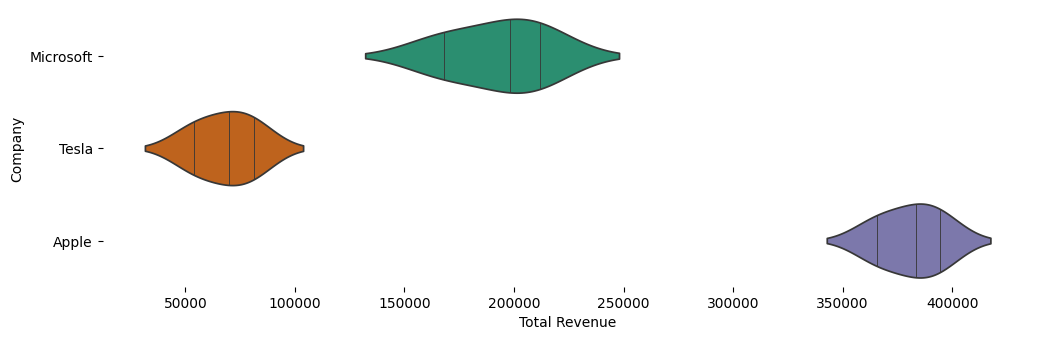

In [14]:
# @title Company vs Total Revenue

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['Company'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Total Revenue', y='Company', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [15]:
df


,Company,Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash flow from Operations,Revenue Growth (%),Net Income Growth (%),Debt-to-Assets Ratio,Net Income Margin
0,Microsoft,2023,211915,72361,411976,205753,87582,NaN,NaN,0.499430,0.341462
1,Microsoft,2022,198270,72738,364840,198298,89035,-6.44,0.52,0.543520,0.366863
2,Microsoft,2021,168088,61271,333779,191791,76740,-15.22,-15.76,0.574605,0.364517
3,Tesla,2023,69773,14974,106618,43009,13256,NaN,NaN,0.403393,0.214610
4,Tesla,2022,81462,12587,82338,36440,14724,16.75,-15.94,0.442566,0.154514
5,Tesla,2021,53823,5644,62131,30548,11497,-33.92,-55.16,0.491671,0.104862
6,Apple,2023,383285,96995,352583,290437,110543,NaN,NaN,0.823741,0.253062
7,Apple,2022,394328,94680,352755,302083,122151,2.88,2.89,0.856354,0.240105
8,Apple,2021,365817,94680,351002,287912,104038,-7.23,-5.13,0.820257,0.258818
